some stuff

In [6]:

import os
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('/workspaces/CP1-24-final/zbpetersbuf/code')
import final as fin

In [68]:
import importlib
import final
importlib.reload(final) 

<module 'final' from '/workspaces/CP1-24-final/zbpetersbuf/code/final.py'>

0.4232737670407106 19


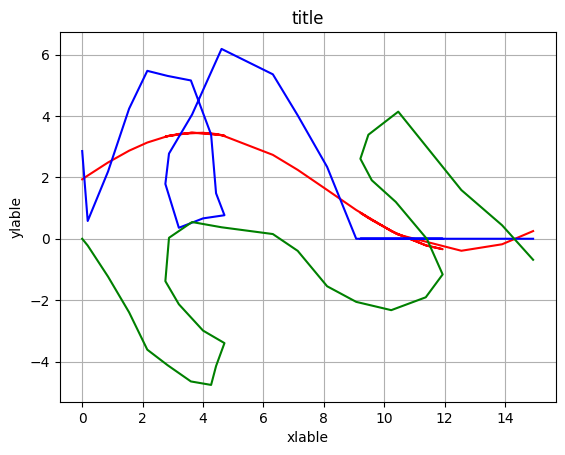

In [69]:
files = fin.filenamelister('sinewalk','.csv')
fle = files[7]
yreal, yn, y, x = fin.goldrule_sig(fle,0.6,0.001,0.0001)
plt.figure()
plt.plot(x,yn, color='red')
plt.plot(x,y, color='blue')
plt.plot(x,yreal, color='green')
plt.title('title')
plt.xlabel('xlable')
plt.ylabel('ylable')
plt.grid()
